In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from pathlib import Path

In [2]:
paths_to_performance = [
    {
        "window": "abdomen",
        "foreground_label": 1,
        "label_description": "parenquima",
        "bbox_scale": 1.0,
        "path_to_performance": "resources/performance_label_1_abdomen.json"
    }
]

In [6]:
performance_df = pd.DataFrame()
for item in paths_to_performance:
    with open(item["path_to_performance"], 'r') as file:
        df = pd.DataFrame(json.load(file))
    df["normalization"] = item["window"]
    df["foreground_label"] = item["foreground_label"]
    df["label_description"] = item["label_description"]
    df["bbox_scale"] = item["bbox_scale"]
    performance_df = pd.concat([performance_df, df])
performance_df.reset_index(drop=True, inplace=True)

In [4]:
min_annotated_pixels = 25
pixel_size_mm = 2.04
min_measurable_size_mm = 10
print(f"Minimum size for measurable lesion (along an axis): {int(np.ceil(min_measurable_size_mm / pixel_size_mm))} pixels ")
print(f"Total bounding boxes: {len(performance_df)}")
performance_df = performance_df[performance_df['annotated_pixels'] >= min_annotated_pixels]
print(f"Total bounding boxes with > {min_annotated_pixels} annotated pixels: {len(performance_df)}")

Minimum size for measurable lesion (along an axis): 5 pixels 
Total bounding boxes: 252191
Total bounding boxes with > 25 annotated pixels: 81922


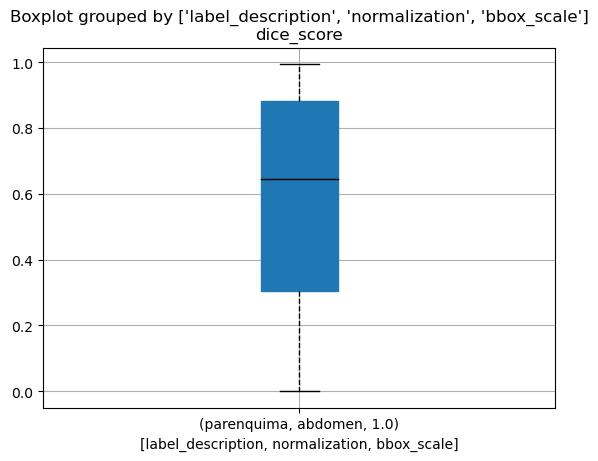

In [5]:
performance_df.boxplot(
    column='dice_score',
    by=['label_description', 'normalization', 'bbox_scale'],
    return_type='both',
    patch_artist=True,
    medianprops={'color': 'k', 'linewidth': 1},
    whiskerprops={'linestyle': '--'}
)
plt.show()